# Exploratory Data Analysis of Video Game Review Information from Steam Website
In this step I'll explore video game information and corresponding user reviews through Valve's Steam digital distribution company and supporting websites.

In [1]:
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
from langdetect import detect

In [2]:
path_steam = "C:/users/ggibs/steam_game_recommender"
path_interim = os.path.join(path_steam, "data/interim/")
path_external = os.path.join(path_steam, "data/external/")

## Video Game Information

In [3]:
app_list = pd.read_csv(os.path.join(path_external, "app_list.csv"), index_col="appid")

In [4]:
app_list.head()

,name
appid,
10,Counter-Strike
20,Team Fortress Classic
30,Day of Defeat
40,Deathmatch Classic
50,Half-Life: Opposing Force


In [5]:
app_list.index

Int64Index([     10,      20,      30,      40,      50,      60,      70,
                 80,     130,     220,
            ...
            1172620, 1174180, 1180380, 1190460, 1213210, 1226470, 1237970,
            1284410, 1286830, 1289310],
           dtype='int64', name='appid', length=1000)

In [9]:
steamspy_data = pd.read_csv(os.path.join(path_external, "steamspy_data.csv"), index_col=[0])

In [10]:
steamspy_data.head()

,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
appid,,,,,,,,,,,,,,,,,,,
10,Counter-Strike,Valve,Valve,NaN,162672,4258,0,"10,000,000 .. 20,000,000",9688,148,218,118,999,999,0,"English, French, German, Italian, Spanish - Sp...",Action,15656,"{'Action': 5325, 'FPS': 4728, 'Multiplayer': 3..."
20,Team Fortress Classic,Valve,Valve,NaN,4458,783,0,"2,000,000 .. 5,000,000",711,0,13,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,90,"{'Action': 734, 'FPS': 298, 'Multiplayer': 252..."
30,Day of Defeat,Valve,Valve,NaN,4389,488,0,"5,000,000 .. 10,000,000",948,0,20,0,499,499,0,"English, French, German, Italian, Spanish - Spain",Action,160,"{'FPS': 777, 'World War II': 243, 'Multiplayer..."
40,Deathmatch Classic,Valve,Valve,NaN,1609,353,0,"5,000,000 .. 10,000,000",25,0,5,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,10,"{'Action': 625, 'FPS': 134, 'Classic': 103, 'M..."
50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,9295,491,0,"5,000,000 .. 10,000,000",188,20,85,20,499,499,0,"English, French, German, Korean",Action,96,"{'FPS': 870, 'Action': 311, 'Classic': 238, 'S..."


In [11]:
steamspy_data.index

Int64Index([     10,      20,      30,      40,      50,      60,      70,
                 80,     130,     220,
            ...
            1172620, 1174180, 1180380, 1190460, 1213210, 1226470, 1237970,
            1284410, 1286830, 1289310],
           dtype='int64', name='appid', length=1000)

## Video Game Reviews

In [12]:
reviews_df = pd.read_csv(os.path.join(path_interim, "reviews.csv"), index_col=[0,1], low_memory=False).sort_index()

C:\Users\ggibs\Anaconda3\envs\steam_game_recommender\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [13]:
reviews_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3753726 entries, (10, 34977170) to (1289310, 76312449)
Data columns (total 21 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   language                        3753726 non-null  object 
 1   review                          3746757 non-null  object 
 2   timestamp_created               3753726 non-null  int64  
 3   timestamp_updated               3753726 non-null  int64  
 4   voted_up                        3753726 non-null  bool   
 5   votes_up                        3753726 non-null  int64  
 6   votes_funny                     3753726 non-null  int64  
 7   weighted_vote_score             3753726 non-null  float64
 8   comment_count                   3753726 non-null  int64  
 9   steam_purchase                  3753726 non-null  bool   
 10  received_for_free               3753726 non-null  bool   
 11  written_during_early_access     375372

In [14]:
reviews_df.index.names

FrozenList(['appid', 'recommendationid'])

In [15]:
reviews_df.index.levels[0]

Int64Index([     10,      20,      30,      40,      50,      60,      70,
                 80,     130,     220,
            ...
            1151340, 1172380, 1172620, 1174180, 1190460, 1213210, 1226470,
            1237970, 1286830, 1289310],
           dtype='int64', name='appid', length=748)

In [10]:
reviews_df.head()

language  \
appid recommendationid            
10    34977170          english   
      34978487          english   
      34980761          english   
      34985180          english   
      34988516          english   

                                                                   review  \
appid recommendationid                                                      
10    34977170                                                  good game   
      34978487                     classic old school game + :steamhappy:   
      34980761          Servidores broken por exemplo: Dou Ctrl+tiro d...   
      34985180          \nBefore I played:\n＼＼ ＿\n　　 ＼( ͡° ͜ʖ ͡°) \n　　...   
      34988516          Good game but sadly not much servers left in t...   

                        timestamp_created  timestamp_updated  voted_up  \
appid recommendationid                                                   
10    34977170                 1505496203         1505496203      True   
      34978487                 1505500384         1505500384      True   
      34980761                 1505507824         1505507824     False   
      34985180                 1505525745         1505525745      True   
      34988516                 1505540844         1514641638      True   

                        votes_up  votes_funny  weighted_vote_score  \
appid recommendationid                                               
10    34977170                 1            0             0.523810   
      34978487                 0            0             0.000000   
      34980761                 0            0             0.476423   
      34985180                 0            1             0.000000   
      34988516                 0            0             0.000000   

                        comment_count  steam_purchase  ...  \
appid recommendationid                                 ...   
10    34977170                      0            True  ...   
      34978487                      0            True  ...   
      34980761                      0            True  ...   
      34985180                      0            True  ...   
      34988516                      0            True  ...   

                        written_during_early_access     author.steamid  \
appid recommendationid                                                   
10    34977170                                False  76561198411856225   
      34978487                                False  76561198230410328   
      34980761                                False  76561198213606925   
      34985180                                False  76561198319303472   
      34988516                                False  76561198340225395   

                        author.num_games_owned  author.num_reviews  \
appid recommendationid                                               
10    34977170                              29                   2   
      34978487                              13                   7   
      34980761                             106                  13   
      34985180                             239                 156   
      34988516                              58                  31   

                        author.playtime_forever  \
appid recommendationid                            
10    34977170                         129549.0   
      34978487                          90881.0   
      34980761                           7081.0   
      34985180                            253.0   
      34988516                           5354.0   

                        author.playtime_last_two_weeks  \
appid recommendationid                                   
10    34977170                                     0.0   
      34978487                                    39.0   
      34980761                                   180.0   
      34985180                                     0.0   
      34988516                                     0.0   

                 

In [20]:
# Blank reviews
reviews_df[reviews_df.review.isnull()]

,,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,...,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,timestamp_dev_responded,developer_response
appid,recommendationid,,,,,,,,,,,,,,,,,,,,,


In [17]:
# Delete blanks
reviews_df.dropna(subset = ['review'], inplace=True)

In [18]:
reviews_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3746757 entries, (10, 34977170) to (1289310, 76312449)
Data columns (total 21 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   language                        3746757 non-null  object 
 1   review                          3746757 non-null  object 
 2   timestamp_created               3746757 non-null  int64  
 3   timestamp_updated               3746757 non-null  int64  
 4   voted_up                        3746757 non-null  bool   
 5   votes_up                        3746757 non-null  int64  
 6   votes_funny                     3746757 non-null  int64  
 7   weighted_vote_score             3746757 non-null  float64
 8   comment_count                   3746757 non-null  int64  
 9   steam_purchase                  3746757 non-null  bool   
 10  received_for_free               3746757 non-null  bool   
 11  written_during_early_access     374675

In [11]:
# User review counts
reviews_df['author.steamid'].value_counts()

76561198315585536    136
76561197993023804    135
76561198062813911    119
76561198101732759    109
76561198064946151    106
                    ... 
76561198367448436      1
76561198438747510      1
76561198359084408      1
76561198250024316      1
76561199000977408      1
Name: author.steamid, Length: 2328273, dtype: int64

In [22]:
user_grouped = reviews_df.groupby('author.steamid')
user_counts = user_grouped['author.steamid'].count()

#.agg(np.mean)

In [49]:
user_counts[user_counts==1].count()

1605415

In [51]:
user_counts[user_counts>1].count()

719150

In [48]:
user_counts[user_counts>=3].count()

313410

In [53]:
user_counts[user_counts==3].count()

174185

In [73]:
dfReviewCounts = pd.DataFrame(columns=['ReviewsGiven', 'ReviewerCount'])

for i in range(3,11):
    if i != 10:
        dfReviewCounts = dfReviewCounts.append({'ReviewsGiven': i, 'ReviewerCount': user_counts[user_counts==i].count()}, ignore_index=True)
    if i == 10:
        dfReviewCounts = dfReviewCounts.append({'ReviewsGiven': "10+", 'ReviewerCount': user_counts[user_counts>=10].count()}, ignore_index=True)

dfReviewCounts

,ReviewsGiven,ReviewerCount
0,3,174185
1,4,63368
2,5,29979
3,6,15779
4,7,9345
5,8,5842
6,9,3858
7,10+,11054


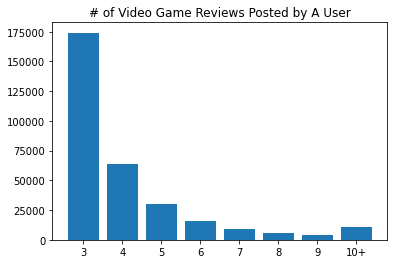

In [77]:
x = ['3', '4', '5', '6', '7', '8', '9', '10+']
y = dfReviewCounts.ReviewerCount
plt.bar(x, y)
plt.title("# of Video Game Reviews Posted by A User")
plt.show()

In [78]:
# filter for three or more reviews
reviews_3up = reviews_df[reviews_df['author.steamid'].map(reviews_df['author.steamid'].value_counts()) >= 3]

In [79]:
reviews_3up.voted_up.value_counts()

True     1207370
False     122492
Name: voted_up, dtype: int64

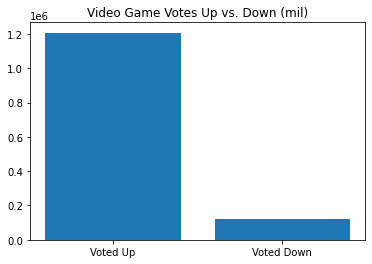

In [91]:
x = ["Voted Up", "Voted Down"]
y = [reviews_3up["voted_up"][reviews_3up["voted_up"] == True].count(), reviews_3up["voted_up"][reviews_3up["voted_up"] == False].count()]
plt.bar(x,y)
plt.title("Video Game Votes Up vs. Down (mil)")
plt.show()

In [140]:
reviews_3up["genre"].update(steamspy_data["genre"])

C:\Users\ggibs\Anaconda3\envs\steam_game_recommender\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [128]:
reviews_3up["genre"] = ""

<ipython-input-128-e8818f3ed9db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_3up["genre"] = ""


In [138]:
reviews_3up["genre"]

appid    recommendationid
10       34978487             
         34985180             
         35022663             
         35054561             
         35061110             
                            ..
1289310  72248605             
         72578210             
         73012543             
         73589413             
         75931193             
Name: genre, Length: 1329862, dtype: object

In [141]:
reviews_3up.head()

language  \
appid recommendationid            
10    34978487          english   
      34985180          english   
      35022663          english   
      35054561          english   
      35061110          english   

                                                                   review  \
appid recommendationid                                                      
10    34978487                     classic old school game + :steamhappy:   
      34985180          \nBefore I played:\n＼＼ ＿\n　　 ＼( ͡° ͜ʖ ͡°) \n　　...   
      35022663                                how can you say no to this.   
      35054561                    Played it since i could talk and walk\n   
      35061110          Where's the knife? Where's the Russian? Where'...   

                        timestamp_created  timestamp_updated  voted_up  \
appid recommendationid                                                   
10    34978487                 1505500384         1505500384      True   
      34985180                 1505525745         1505525745      True   
      35022663                 1505652274         1506723563      True   
      35054561                 1505776630         1505776630      True   
      35061110                 1505813604         1505813604      True   

                        votes_up  votes_funny  weighted_vote_score  \
appid recommendationid                                               
10    34978487                 0            0                  0.0   
      34985180                 0            1                  0.0   
      35022663                 1            0                  0.5   
      35054561                 0            0                  0.0   
      35061110                 0            0                  0.0   

                        comment_count  steam_purchase  ...     author.steamid  \
appid recommendationid                                 ...                      
10    34978487                      0            True  ...  76561198230410328   
      34985180                      0            True  ...  76561198319303472   
      35022663                      0            True  ...  76561198282902022   
      35054561                      0            True  ...  76561198027268898   
      35061110                      0            True  ...  76561198131478444   

                        author.num_games_owned  author.num_reviews  \
appid recommendationid                                               
10    34978487                              13                   7   
      34985180                             239                 156   
      35022663                             145                  58   
      35054561                             505                 110   
      35061110                              26                   8   

                        author.playtime_forever  \
appid recommendationid                            
10    34978487                          90881.0   
      34985180                            253.0   
      35022663                          37587.0   
      35054561                             38.0   
      35061110                            557.0   

                        author.playtime_last_two_weeks  \
appid recommendationid                                   
10    34978487                                    39.0   
      34985180                                     0.0   
      35022663                                     0.0   
      35054561                                     0.0   
      35061110                                     0.0   

                        author.playtime_at_review  author.last_played  \
appid recommendationid                                                  
10    34978487                            37281.0        1.599362e+09   
      34985180                               45.0        1.517853e+09   
      35022663                              472.0        1.543593e+09   
      35054561                        

In [48]:
# reviews_40.review
for i in range(len(reviews_df)):                                         
    try:                                                          
        reviews_df.language.iloc[i] = detect(reviews_df.review.iloc[i])                                      
    except:                                                                                                         
       reviews_df.language.iloc[i] = 'no'               


In [9]:
reviews_40.iloc[0][1]

'very good\ngreat graphics'

In [8]:
detect(reviews_40.iloc[0][1])

'en'